In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):

  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)
  
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x

In [3]:
model=Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("/content/iris.csv")

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
features=df.drop('target',axis=1).values
labels=df['target'].values

In [8]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.3,random_state=25)

In [9]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)

In [10]:
y_test=torch.LongTensor(y_test)
y_train=torch.LongTensor(y_train)

In [11]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [12]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)
epochs=300
losses=[]
for i in range(epochs):
  # forward and get predictions
  y_pred=model.forward(x_train)
  #calculate loss/error
  loss=criterion(y_pred,y_train)
  losses.append(loss)
  if i%10==0:
    print(f"Epoch: {i} Loss: {loss} ")
  #backpropagation 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.167543888092041 
Epoch: 10 Loss: 1.012305736541748 
Epoch: 20 Loss: 0.7869352698326111 
Epoch: 30 Loss: 0.4861556589603424 
Epoch: 40 Loss: 0.30292433500289917 
Epoch: 50 Loss: 0.1789674311876297 
Epoch: 60 Loss: 0.10532747954130173 
Epoch: 70 Loss: 0.07101614773273468 
Epoch: 80 Loss: 0.05729768052697182 
Epoch: 90 Loss: 0.05052667856216431 
Epoch: 100 Loss: 0.04670087993144989 
Epoch: 110 Loss: 0.04412221163511276 
Epoch: 120 Loss: 0.042177144438028336 
Epoch: 130 Loss: 0.04059150442481041 
Epoch: 140 Loss: 0.0392274484038353 
Epoch: 150 Loss: 0.038012076169252396 
Epoch: 160 Loss: 0.03690338879823685 
Epoch: 170 Loss: 0.03587673231959343 
Epoch: 180 Loss: 0.034915849566459656 
Epoch: 190 Loss: 0.034010354429483414 
Epoch: 200 Loss: 0.03315320238471031 
Epoch: 210 Loss: 0.032339729368686676 
Epoch: 220 Loss: 0.031566720455884933 
Epoch: 230 Loss: 0.03126665577292442 
Epoch: 240 Loss: 0.030168810859322548 
Epoch: 250 Loss: 0.02956666238605976 
Epoch: 260 Loss: 0.02896

In [13]:
def plot_loss(ls,ep):
  plt.plot(range(epochs),ls)
  plt.ylabel("Loss")
  plt.xlabel("Epoch")

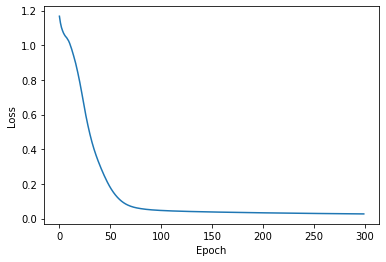

In [14]:
plot_loss(losses,epochs)

In [15]:
with torch.no_grad():
  y_eval=model.forward(x_test)
  loss=criterion(y_eval,y_test)

In [16]:
loss

tensor(0.0867)

In [17]:
correct=0
with torch.no_grad():
  for i,data in enumerate(x_test):
    y_ev=model.forward(data)
    print(f"{i+1}: {str(y_ev)} pred: {y_ev.argmax().item()} actual: {y_test[i]}")

1: tensor([ 17.9838,   9.9668, -22.7470]) pred: 0 actual: 0
2: tensor([-4.3369,  6.0045,  5.1380]) pred: 1 actual: 1
3: tensor([-3.8307,  5.8104,  4.6023]) pred: 1 actual: 1
4: tensor([-0.8285,  8.1280, -0.0601]) pred: 1 actual: 1
5: tensor([-9.0607,  1.7368, 13.1406]) pred: 2 actual: 2
6: tensor([ 0.1663,  9.0395, -1.5469]) pred: 1 actual: 1
7: tensor([-4.6711,  5.3100,  5.9123]) pred: 2 actual: 2
8: tensor([ 16.5733,   9.5622, -21.2126]) pred: 0 actual: 0
9: tensor([ 1.3173,  8.9377, -3.8253]) pred: 1 actual: 1
10: tensor([ 2.0861,  8.5386, -4.7147]) pred: 1 actual: 1
11: tensor([ 17.7760,   9.5383, -22.2035]) pred: 0 actual: 0
12: tensor([ 17.1467,   9.5581, -21.6657]) pred: 0 actual: 0
13: tensor([ 16.3641,   9.3508, -20.8708]) pred: 0 actual: 0
14: tensor([-3.9766,  6.3229,  4.5916]) pred: 1 actual: 2
15: tensor([ 16.8232,   9.4569, -21.3460]) pred: 0 actual: 0
16: tensor([-0.8997,  9.1009, -0.5154]) pred: 1 actual: 1
17: tensor([-6.8007,  4.7056,  9.2217]) pred: 2 actual: 2
18: t

In [18]:
#for saving weights and bias not model
torch.save(model.state_dict(),"my_iris_model.pt")
new_model=Model()
new_model.load_state_dict(torch.load("my_iris_model.pt"))

<All keys matched successfully>

In [19]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [20]:
#save entire model
torch.save(model,"my_iris_model.pickle")
new_model=torch.load("/content/my_iris_model.pickle")

In [21]:
new_model.eval

<bound method Module.eval of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [22]:
mystery_iris=torch.Tensor([5.6,3.7,2.2,0.5])

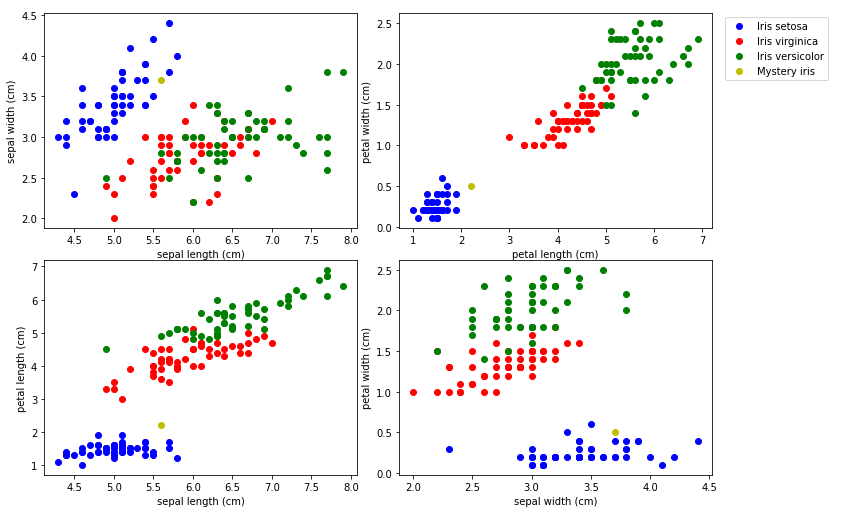

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [24]:
with torch.no_grad():
  pred=new_model.forward(mystery_iris)
  print(pred,pred.argmax().item())

tensor([ 15.6388,   9.7899, -20.1435]) 0
